<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/FeatureEngineering/Handling_Categorical_Data/OrdinalEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinal Data Definition:
Ordinal data is a statistical type of quantitative data in which variables exist in naturally occurring ordered categories. The distance between two categories is not established using ordinal data.

In statistics, a group of ordinal numbers indicates ordinal data and a group of ordinal data are represented using an ordinal scale. The main difference between nominal and ordinal data is that ordinal has an order of categories while nominal doesn’t.

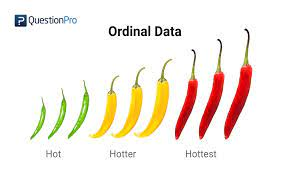

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("purchase_data.csv")

In [5]:
df.sample(5)

,age,gender,review,education,purchased
1,68,Female,Poor,UG,No
42,30,Female,Good,PG,Yes
34,86,Male,Average,School,No
45,61,Male,Poor,PG,Yes
40,39,Male,Good,School,No


#### gender - nominal
#### review - ordinal
#### purchased - nominal
#### education - ordinal

In [6]:
# we will ignore age and gender for now
df = df.iloc[:,2:]

In [7]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:2], df.iloc[:,-1], test_size=0.2)

In [10]:
X_train.shape, X_test.shape

((40, 2), (10, 2))

In [12]:
X_train.head()

,review,education
19,Poor,PG
4,Average,UG
31,Poor,School
11,Good,UG
30,Average,UG


In [15]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])
# categories are to be given in ascending order of importance

In [17]:
X_train = oe.fit_transform(X_train)

In [18]:
X_test = oe.transform(X_test)

In [21]:
X_train[:5]

array([[0., 2.],
       [1., 1.],
       [0., 0.],
       [2., 1.],
       [1., 1.]])

In [22]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

# Never use LabelEncoder for input columns(i.e. X)
# It's explicit for target values(i.e. y) and not for inputs.

In [23]:
 from sklearn.preprocessing import LabelEncoder

 le = LabelEncoder()

In [24]:
le.fit(y_train)

LabelEncoder()

In [25]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [26]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [28]:
y_train[:5]

array([1, 0, 1, 1, 0])